Task 3: Predict Patient Health Categories 

1. For the first step of preprocessing the dataset, I imported beneficial libraries for this task and also assigned df as the variable that holds the dataset.

In [131]:
import pandas as pd   # This import will be used for data manipulation
import numpy as np   # This import will be used for working with arrays
import seaborn as sns   # This import will be used for data visualisation and dataset loading 
import matplotlib.pyplot as plt   # This import will be used for plotting
from sklearn.model_selection import train_test_split   # This import will be used for splittig data into train and test sets 
from sklearn.preprocessing import StandardScaler   # This import will be used for Scaling Features  

df1 = pd.read_csv("test_data.csv")   # Loads the dataset into the variable df1
df = df1.drop("vitals_blood_pressure", axis = 1)   # Due to blood pressure being displayed as systolic/diastolic this would alter the 
print("Dataset preview:\n", df.head())   # Displays the first few rows of th dataset

Dataset preview:
          date  vitals_heart_rate        vitals_temperature  \
0  2025-03-17  72|75|68|71|74|73  98.6|98.4|98.7|98.5|98.8   
1  2025-03-18  68|70|67|72|69|71  98.5|98.3|98.4|98.6|98.5   
2  2025-03-19  65|67|64|66|68|67  98.4|98.2|98.3|98.5|98.4   
3  2025-03-20  67|69|66|68|70|68  98.5|98.3|98.4|98.6|98.5   
4  2025-03-21  71|73|70|72|74|72  98.6|98.4|98.5|98.7|98.6   

   sleep_duration_hours sleep_quality  sleep_interruptions  activity_steps  \
0                   6.5          poor                    3            4500   
1                   7.2          fair                    2            6700   
2                   8.1          good                    1            8200   
3                   7.8          good                    1            7800   
4                   6.8          fair                    2            5200   

   activity_active_minutes  activity_sedentary_hours  nutrition_calories  \
0                       35                      10.5            

2. To be able to view some important statistics of the dataset, I used .info and .describe to be able to analyse the dataset.

In [132]:
# This will allow to view the basic information about the dataset
print(df.info())   # Output: this will show the column names, data types, non-null counts and so on 

# We need to now also view the statistical summary of numrical columns 
print(df.describe())   # This wil output thingd such as the mean, std, min, 25%, 50%, 75%, max for numerical columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        20 non-null     object 
 1   vitals_heart_rate           20 non-null     object 
 2   vitals_temperature          20 non-null     object 
 3   sleep_duration_hours        20 non-null     float64
 4   sleep_quality               20 non-null     object 
 5   sleep_interruptions         20 non-null     int64  
 6   activity_steps              20 non-null     int64  
 7   activity_active_minutes     20 non-null     int64  
 8   activity_sedentary_hours    20 non-null     float64
 9   nutrition_calories          20 non-null     int64  
 10  nutrition_water_oz          20 non-null     int64  
 11  nutrition_macros_carbs_g    20 non-null     int64  
 12  nutrition_macros_protein_g  20 non-null     int64  
 13  nutrition_macros_fat_g      20 non-nu

3. To be able to use numerical data only, any string data needs to be encoded first - in this case the sleep_quality column.  

In [133]:
# As the dataset contains string variables, I will encode sleep quality to integers
df['sleep_quality'] = df['sleep_quality'].map({'poor':0, 'fair':1, 'good':2, 'excellent':3})   # This will map 'sleep_quality' to 0, 1, 2 and 3 for poor, fair, good and excellent 

print(df)

          date  vitals_heart_rate        vitals_temperature  \
0   2025-03-17  72|75|68|71|74|73  98.6|98.4|98.7|98.5|98.8   
1   2025-03-18  68|70|67|72|69|71  98.5|98.3|98.4|98.6|98.5   
2   2025-03-19  65|67|64|66|68|67  98.4|98.2|98.3|98.5|98.4   
3   2025-03-20  67|69|66|68|70|68  98.5|98.3|98.4|98.6|98.5   
4   2025-03-21  71|73|70|72|74|72  98.6|98.4|98.5|98.7|98.6   
5   2025-03-22  69|71|68|70|72|70  98.5|98.3|98.4|98.6|98.5   
6   2025-03-23  70|72|69|71|73|71  98.6|98.4|98.5|98.7|98.6   
7   2025-03-17  72|75|68|71|74|73  98.6|98.4|98.7|98.5|98.8   
8   2025-03-18  68|70|67|72|69|71  98.5|98.3|98.4|98.6|98.5   
9   2025-03-19  65|67|64|66|68|67  98.4|98.2|98.3|98.5|98.4   
10  2025-03-20  67|69|66|68|70|68  98.5|98.3|98.4|98.6|98.5   
11  2025-03-21  71|73|70|72|74|72  98.6|98.4|98.5|98.7|98.6   
12  2025-03-22  69|71|68|70|72|70  98.5|98.3|98.4|98.6|98.5   
13  2025-03-23  70|72|69|71|73|71  98.6|98.4|98.5|98.7|98.6   
14  2025-03-24  80|82|78|81|83|79  99.1|98.9|99.2|98.8|

4. For heart rate and temperature, below I calculated a mean to replace the list of values to be able to utilise the data better. First I had to replace the '|' symbol then work out the mean.

In [134]:

def seperate_string(val):   # Function to seperate the string and remove the '|' from the data points 
    try:
        return np.mean([float(x) for x in val.split('|')])
    except Exception as e:
        return np.nan

df['vitals_heart_rate'] = df['vitals_heart_rate'].apply(seperate_string)   # Replaces multiple data in the data point with the mean vital heart rate
df['vitals_temperature'] = df['vitals_temperature'].apply(seperate_string)   # Replaces multiple data in the data point with the mean vital temperature

print("\nData with mean:")

print(df.head())


Data with mean:
         date  vitals_heart_rate  vitals_temperature  sleep_duration_hours  \
0  2025-03-17          72.166667               98.60                   6.5   
1  2025-03-18          69.500000               98.46                   7.2   
2  2025-03-19          66.166667               98.36                   8.1   
3  2025-03-20          68.000000               98.46                   7.8   
4  2025-03-21          72.000000               98.56                   6.8   

   sleep_quality  sleep_interruptions  activity_steps  \
0              0                    3            4500   
1              1                    2            6700   
2              2                    1            8200   
3              2                    1            7800   
4              1                    2            5200   

   activity_active_minutes  activity_sedentary_hours  nutrition_calories  \
0                       35                      10.5                2200   
1                  

5. Now the data has only numerical values and has one value for each datapoint, the next step was to label the data based on thresholds. The three labels are:
 - Good: Stable vitals, adequate sleep, and healthy activity
 - Moderate: Minor deviations in health indicators
 - Poor: Significant abnormalities, insufficient sleep, or low activity

Based on these labels, I created a point style system, to be able to accurately label each row of the data. 

In [135]:
def label_health(row):
    points = 0
    if row['vitals_heart_rate'] <= 70:   # if statement for heart rate to check health level 
        points += 2                        # Less than 70 means good health
    elif row['vitals_heart_rate'] <= 75:
        points += 1                        # Moderate health

    if row['sleep_quality'] >= 2:   # if statement for sleep quality to check health level
        points += 2                    # Quality of 2 or 3 (good or excellent) good health 
    elif row['sleep_quality'] == 1:
        points += 1                          # Moderate health

    if row['sleep_interruptions'] == 0:   # if statement for sleep interruptions to check health level
        points += 2                          # No sleep interruptions good health
    elif row['sleep_interruptions'] == 1:
        points += 1                          # Moderate health
    elif row['sleep_interruptions'] == 2:
        points += 1

    if row['activity_steps'] >= 6000:   # if statement for activity steps to check health level
        points += 2                        # More than 6000 steps good health
    elif row['activity_steps'] >= 4000:
        points += 1                        # Moderate health

    if points >= 8:
        return 2    # Good health level
    elif points >= 5:
        return 1   # Moderate health level
    else:
        return 0   # Poor health level 
    
df['health_label'] = df.apply(label_health, axis=1)
print(df.head())

         date  vitals_heart_rate  vitals_temperature  sleep_duration_hours  \
0  2025-03-17          72.166667               98.60                   6.5   
1  2025-03-18          69.500000               98.46                   7.2   
2  2025-03-19          66.166667               98.36                   8.1   
3  2025-03-20          68.000000               98.46                   7.8   
4  2025-03-21          72.000000               98.56                   6.8   

   sleep_quality  sleep_interruptions  activity_steps  \
0              0                    3            4500   
1              1                    2            6700   
2              2                    1            8200   
3              2                    1            7800   
4              1                    2            5200   

   activity_active_minutes  activity_sedentary_hours  nutrition_calories  \
0                       35                      10.5                2200   
1                       42          

6. To now visualise important features of the dataset, I will create graphs to show which attributes are most important for the target variable.

In [136]:
# dfV represents the feature and target variables that were used in the training models. This data will be used to output graphs to see the relevance for the target variable - health_label.
dfV= df[["vitals_heart_rate", "sleep_duration_hours", "activity_steps", "health_label"]]  

# These are continuous variables, except health label, where they will be added with the else statement. 
# Both arrays of categorical and continuous are empty at the start but as the code goes through dfV they will fill depepending on what type of attribute it is.
categorical_val = []
continuous_val = []
for column in dfV.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)   # Continuous values will be added to continuous_val

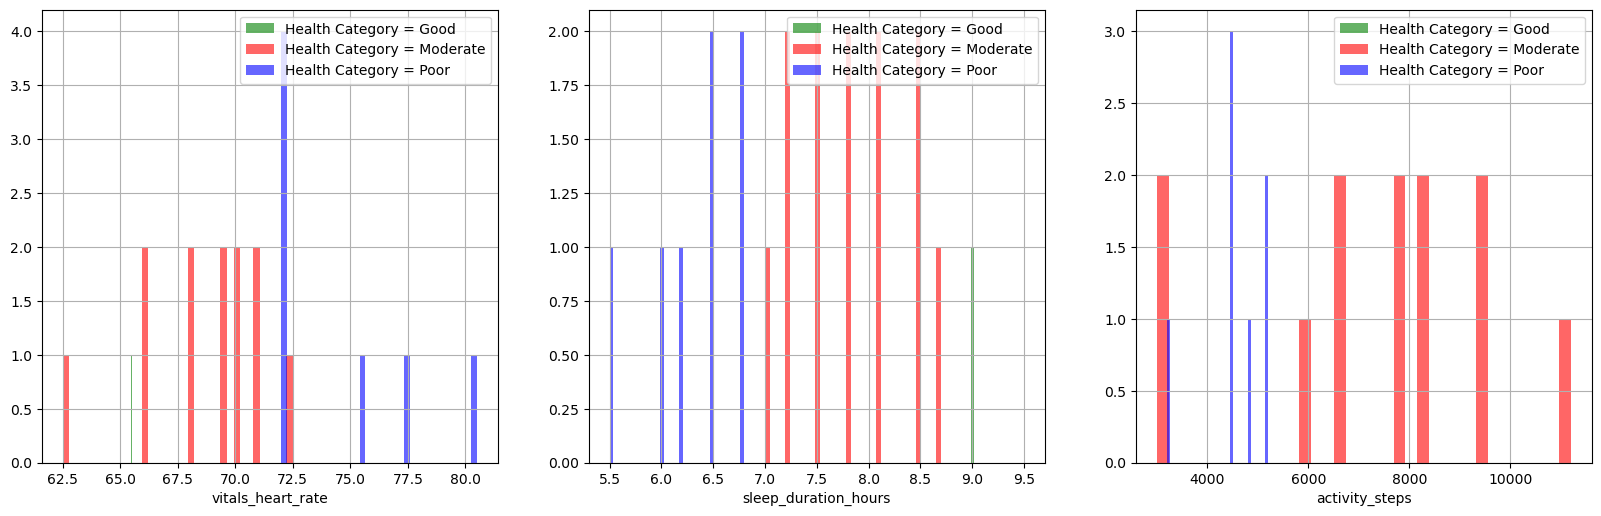

In [137]:
plt.figure(figsize = (20, 20))   # The size of each graph will be 20 by 20.

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 3, i)   # The layout, being three subplots on each row. For however many graphs there will be. In this case 3.
    dfV[dfV["health_label"] == 2][column].hist(bins = 35, color = 'green', label = 'Health Category = Good', alpha = 0.6)   # Shown in green for rows in the table that have 2 in the health_label column for Good. 
    dfV[dfV["health_label"] == 1][column].hist(bins = 35, color = 'red', label = 'Health Category = Moderate', alpha = 0.6)   # Shown in red for rows in the table that have 1 in the health_column column for Moderate.
    dfV[dfV["health_label"] == 0][column].hist(bins = 35, color = 'blue', label = 'Health Category = Poor', alpha = 0.6)   # Shown in blue for rows in the table that have 0 in the health_column column for Poor. 
    plt.legend()
    plt.xlabel(column)   # Label on the x axis to show what attribute is being shown. Y axis shows the number of people who have these 

7.To also show the relation between different componenets of the dataset, below is a correlation heatmap.

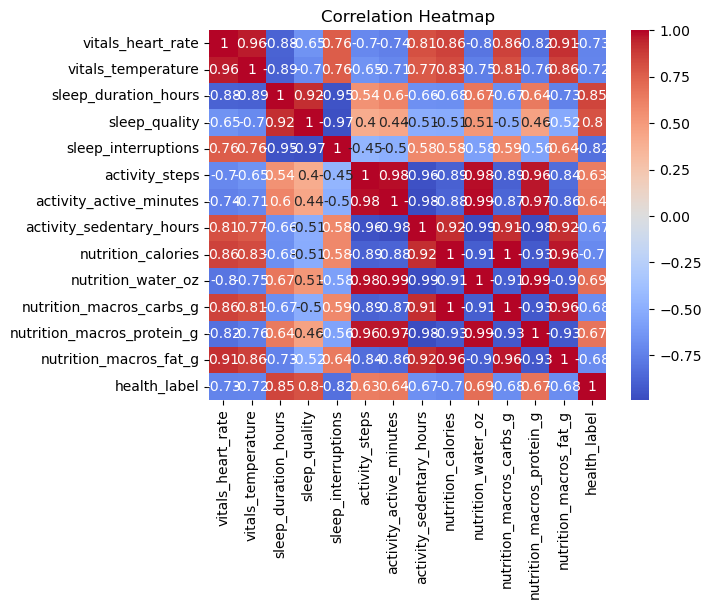

In [138]:
# This correlation heatmap can help to choose important features of the dataset and show possible redundant information dependant on correlation.
dfn = df.drop("date", axis = 1)   # Correlated map showing all attributes except date.
sns.heatmap(dfn.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

8. To be able to prepare the data for machine learning models, I scaled features to be able to reduce abnormalities. 

In [139]:
# Initialise scaler 
scaler = StandardScaler()

# Scale the following columns to achieve better accuracy when training models. 
df[['vitals_heart_rate', 'vitals_temperature','sleep_duration_hours', 'sleep_interruptions', 'activity_steps','activity_active_minutes', 'activity_sedentary_hours', 'nutrition_calories', 'nutrition_water_oz', 'nutrition_macros_carbs_g', 'nutrition_macros_protein_g', 'nutrition_macros_fat_g']] = scaler.fit_transform(df[['vitals_heart_rate', 'vitals_temperature', 'sleep_duration_hours', 'sleep_interruptions', 'activity_steps', 
    'activity_active_minutes', 'activity_sedentary_hours', 'nutrition_calories', 'nutrition_water_oz', 'nutrition_macros_carbs_g', 'nutrition_macros_protein_g', 'nutrition_macros_fat_g']])

print(df)

          date  vitals_heart_rate  vitals_temperature  sleep_duration_hours  \
0   2025-03-17           0.389806            0.398914             -0.918120   
1   2025-03-18          -0.266709           -0.308022             -0.170813   
2   2025-03-19          -1.087354           -0.812976              0.790011   
3   2025-03-20          -0.635999           -0.308022              0.469736   
4   2025-03-21           0.348774            0.196932             -0.597846   
5   2025-03-22          -0.143613           -0.308022              1.217043   
6   2025-03-23           0.102581            0.196932              0.149461   
7   2025-03-17           0.389806            0.398914             -0.918120   
8   2025-03-18          -0.266709           -0.308022             -0.170813   
9   2025-03-19          -1.087354           -0.812976              0.790011   
10  2025-03-20          -0.635999           -0.308022              0.469736   
11  2025-03-21           0.348774            0.19693

9. Next was to set the data into training and testing sets to move onto training a classification model.

In [140]:
# The data is split into features (X) and targets (y)

# Feature variables to ensure the models can be as accurate as possible.
X = df[["vitals_heart_rate", "sleep_duration_hours", "sleep_interruptions", "activity_steps", "activity_active_minutes"]]   # All columns shown have been selected as features of this dataset.
y = df["health_label"]   # Target variable

# Now we will split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Prints out the training and testing sets with the 70% and 30% split respectively.
print("Training set size:", X_train.shape) 
print("Testing set size:", X_test.shape)

Training set size: (14, 5)
Testing set size: (6, 5)


10. Due to this being a classification task, I chose Logistic Regression as the model to train. Below is the layout of the report to showcase scores such as:
 - precision 
 - recall
 - f1-score
 - support 
 Once the model is trained, I will print out the classification report to show the outcome. 

In [141]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   #Imports for all important report metrics for classification tasks 

def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        pred = clf.predict(X_train)   # Here we will use predictions 
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True, zero_division=0))   # For train reports 
        print("Train - Test Result:\n====================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("____________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")   # Shows values such as the F1-score, precision, recall and so on.

    elif train == False:
        pred = clf.predict(X_test)   # Here we will use prediction to gain information for the testing set 
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True, zero_division=0))   # For test reports 
        print("Test - Test Result:\n====================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("____________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")


11. Below is the code that uses the training and testing sets to train the logistic regression model using an import from sklearn.linear_model. 

In [142]:
from sklearn.linear_model import LogisticRegression   # Import to train the logistic regression model

lr_clf = LogisticRegression(solver='liblinear')   # The liblinear library is used to optimise the models parameters during training 
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)   # Printing the outcome of the training set
print()
print()
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)   # Printing the outcome of the testing set

Train - Test Result:
Accuracy Score: 85.71%
____________________________________________________________________
CLASSIFICATION REPORT:
                  0      1    2  accuracy  macro avg  weighted avg
precision  0.833333  0.875  0.0  0.857143   0.569444      0.797619
recall     1.000000  0.875  0.0  0.857143   0.625000      0.857143
f1-score   0.909091  0.875  0.0  0.857143   0.594697      0.824675
support    5.000000  8.000  1.0  0.857143  14.000000     14.000000


Test - Test Result:
Accuracy Score: 100.00%
____________________________________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    2.0  4.0       1.0        6.0           6.0


12. To further show the outcome of the logistic regression model, below is the code to output the confusion matrix of the testing set. 

In [143]:
def print_score(clf, X_train, y_train, X_test, y_test, train = True):   # Layout of the confusion matrix for visualisation 
    if train:   # Confusion matrix for training set.
        pred = clf.predict(X_train)
        print("____________________________________________________________________")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}\n")

    elif train == False:   # Confusion matrix for testing set.
        pred = clf.predict(X_test)
        print("____________________________________________________________________")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}\n")

In [144]:
print("\nLogistic Regression:")   # Prints out the logistic regression testing set confusion matrix
print_score(lr_clf, X_train, y_train, X_test, y_test, train = False)


Logistic Regression:
____________________________________________________________________
Confusion Matrix:
 [[2 0]
 [0 4]]



Documentation:

To be able to train the chosen learning model, I had to preprocess the raw data from the .csv file to be able to ensure the training model was as accurate as possible. This led to dropping the blood pressure column due to the data being unable to be kept as systolic/diastolic. I first imported several libraries to help achieve this. The first preprocessing step was to encode data: map numerical data onto string data. After the data was all numerical, I then calculated the mean of the columns that had multiple entries. This was to have a representative number of the column but would also be useful when scaling. Features were scaled so the columns of data were on a similar scale. This was essential to then be able to train a model on this data. To use some of the data for training and some for testing, I then split the data into training and testing sets to be able to train the Logistic Regression model.

When it came to defining the health labels, variables such as activity, sleep and heart rate were used to create these based on a points system. The reason for using this data was due to them being quantitive data and things which contribute to overall health. Both sleep and heart rate can indicate how the body is functioning and activity can show the how steps and exercise can affect health. The points system was to accurately categorise each, with only those rows that had maximum points being categorised as good. Any minor deviations would've been awarded less points so they would have only been scored as moderate. The reason for choosing the logistic regression model is because it is most suitable due to the data being categorised into three health labels and is easier to interpret. It helps as this data uses different variables. This is optimal for the logistic regression model as these variables can then be used to predict the health label for each row and Logistic Regression can comprehensively analyse multiple factors that can influence the outcome. To evaluate the performance, metrics such as f1-score and accuarcy were outputted in a report to see if the data and preprocessing choices used were efficient in creating a high accuracy learning machine model. As we can see the training model had an output of 85.71% and the testing accuracy was 100%.